# Sampling from a MNIST Autoencoder
In this notebook we will explore the notion of sampling from autoencoders trained on mnist. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import losses
from keras.callbacks import EarlyStopping
from tensorflow.examples.tutorials.mnist import input_data
from keras import backend as K
import tensorflow as tf
from ipywidgets import interact_manual,interact
import pandas as pd
from keras.models import load_model

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [123]:
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True,device_count = {'CPU' : 1, 'GPU' : 0}))
K.set_session(sess)

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

# First we will zip the training labels with the training images
dataWithLabels = zip(mnist.train.labels, mnist.train.images)

# Now let's turn this into a dictionary where subsets of the images in respect 
# to digit class are stored via the corresponding key.

# Init dataDict with keys [0,9] and empty lists.
digitDict = {}
for i in range(0,10):
    digitDict[i] = []

# Assign a list of image vectors to each corresponding digit class index. 
for i in dataWithLabels:
    digitDict[i[0]].append(i[1])

# Convert the lists into numpy matricies. (could be done above, but I claim ignorace)
for i in range(0,10):
    digitDict[i] = np.matrix(digitDict[i])
    print("Digit {0} matrix shape: {1}".format(i,digitDict[i].shape))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Digit 0 matrix shape: (5444, 784)
Digit 1 matrix shape: (6179, 784)
Digit 2 matrix shape: (5470, 784)
Digit 3 matrix shape: (5638, 784)
Digit 4 matrix shape: (5307, 784)
Digit 5 matrix shape: (4987, 784)
Digit 6 matrix shape: (5417, 784)
Digit 7 matrix shape: (5715, 784)
Digit 8 matrix shape: (5389, 784)
Digit 9 matrix shape: (5454, 784)


In [67]:
def simpleAE(encoding_dim = 32, input_dim = 784, outActivation='relu', midActivation='relu'):

    # this is our input placeholder
    input_img = Input(shape=(input_dim,))
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim, activation=midActivation)(input_img)
    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(input_dim, activation=outActivation)(encoded)

    # this model maps an input to its reconstruction
    return Model(input_img, decoded)



In [24]:
ae1 = simpleAE(64,784)
ae1.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
history = ae1.fit(digitDict[0], digitDict[0],
                    epochs=100,
                    batch_size=20,
                    shuffle=True,verbose=1)

In [28]:
def sampleAE(autoEnc):
    w=10
    h=10
    fig=plt.figure(figsize=(20, 20))
    columns = 4
    rows = 5
    for i in range(1, columns*rows +1):
        res = autoEnc.predict(np.random.binomial(1,.5,(1,28*28)))
        fig.add_subplot(rows, columns, i)
        # For pretty pics, add the argument - interpolation="bicubic"
        plt.imshow(res.reshape(28,28),cmap="gray")
    plt.show()

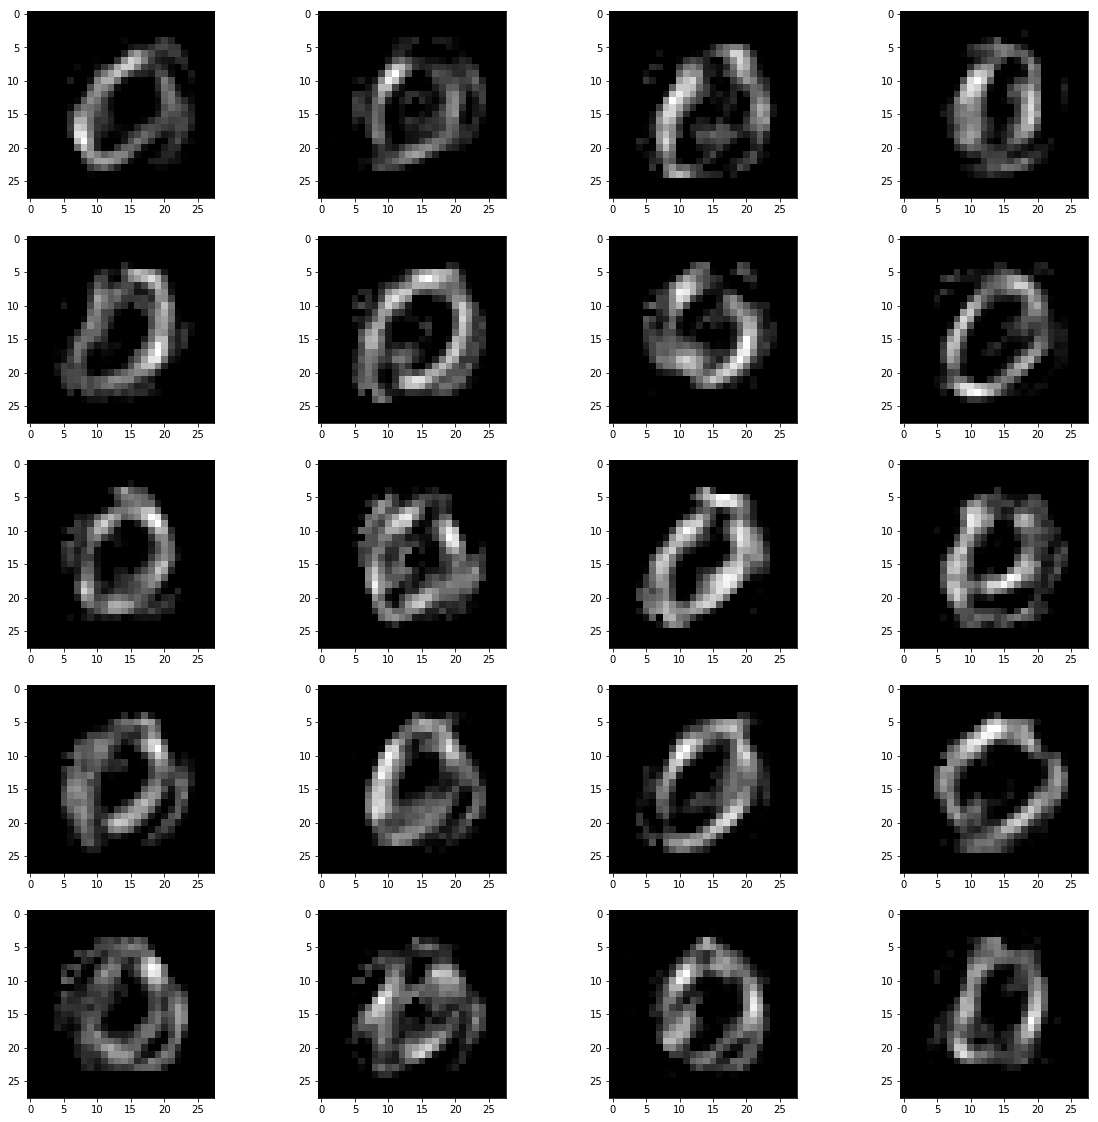

In [29]:
sampleAE(ae1)

In [41]:
ae1 = simpleAE(64,784)
ae1.compile(optimizer='adadelta', loss='mean_squared_error')

In [42]:
history = ae1.fit(digitDict[0], digitDict[0],
                    epochs=100,
                    batch_size=20,
                    shuffle=True,verbose=1)

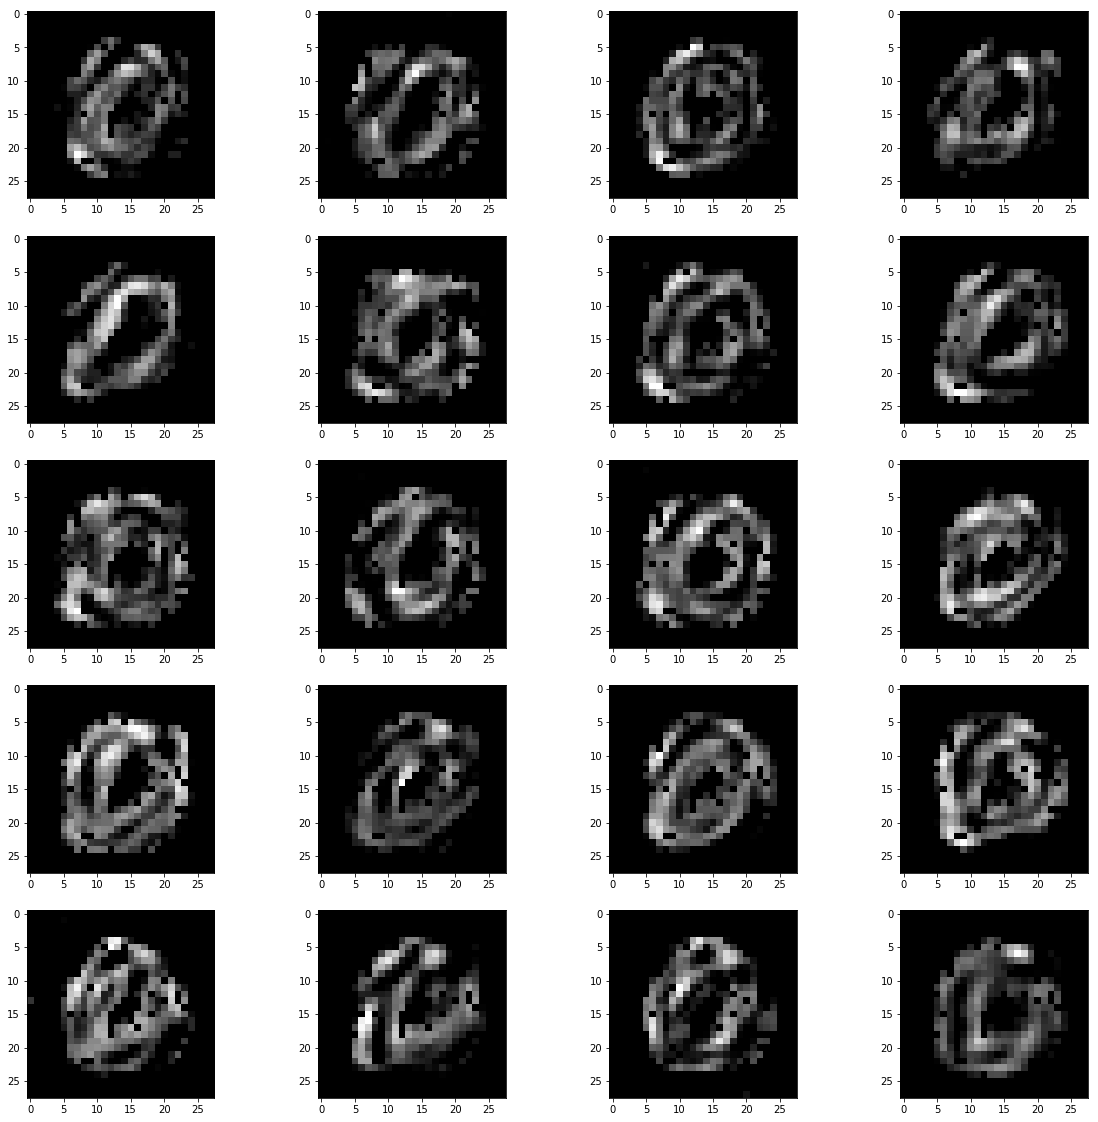

In [37]:
sampleAE(ae1)

In [ ]:
ae1 = simpleAE(5,784,'relu')
ae1.compile(optimizer='adadelta', loss='binary_crossentropy')

history = ae1.fit(digitDict[1], digitDict[1],
                    epochs=100,
                    batch_size=100,verbose=1)

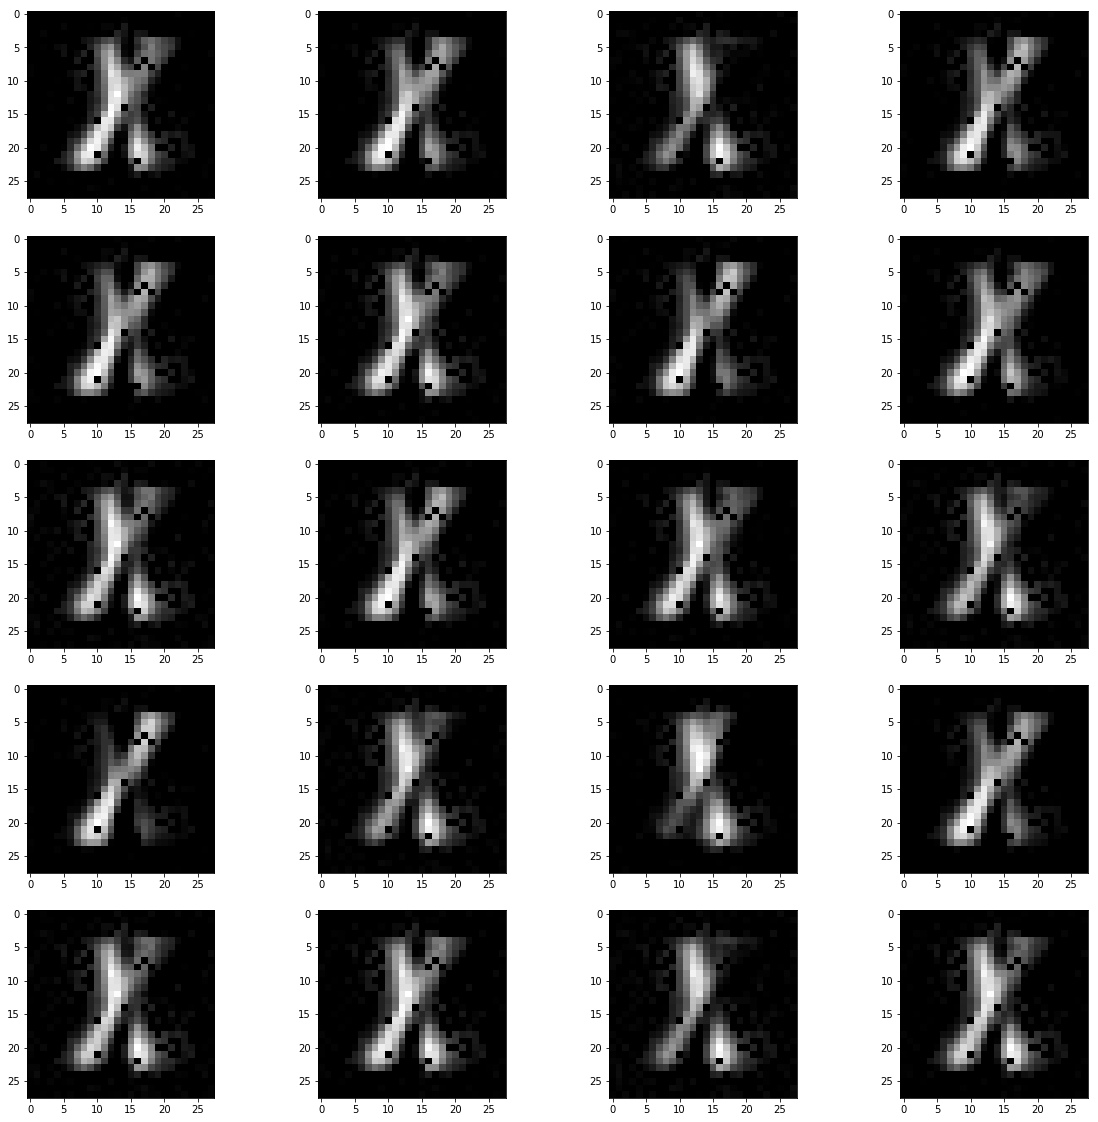

In [59]:
sampleAE(ae1)

In [ ]:
ae1 = simpleAE(5,784,'sigmoid')
ae1.compile(optimizer='adadelta', loss='binary_crossentropy')

history = ae1.fit(digitDict[1], digitDict[1],
                    epochs=100,
                    batch_size=100,verbose=1)

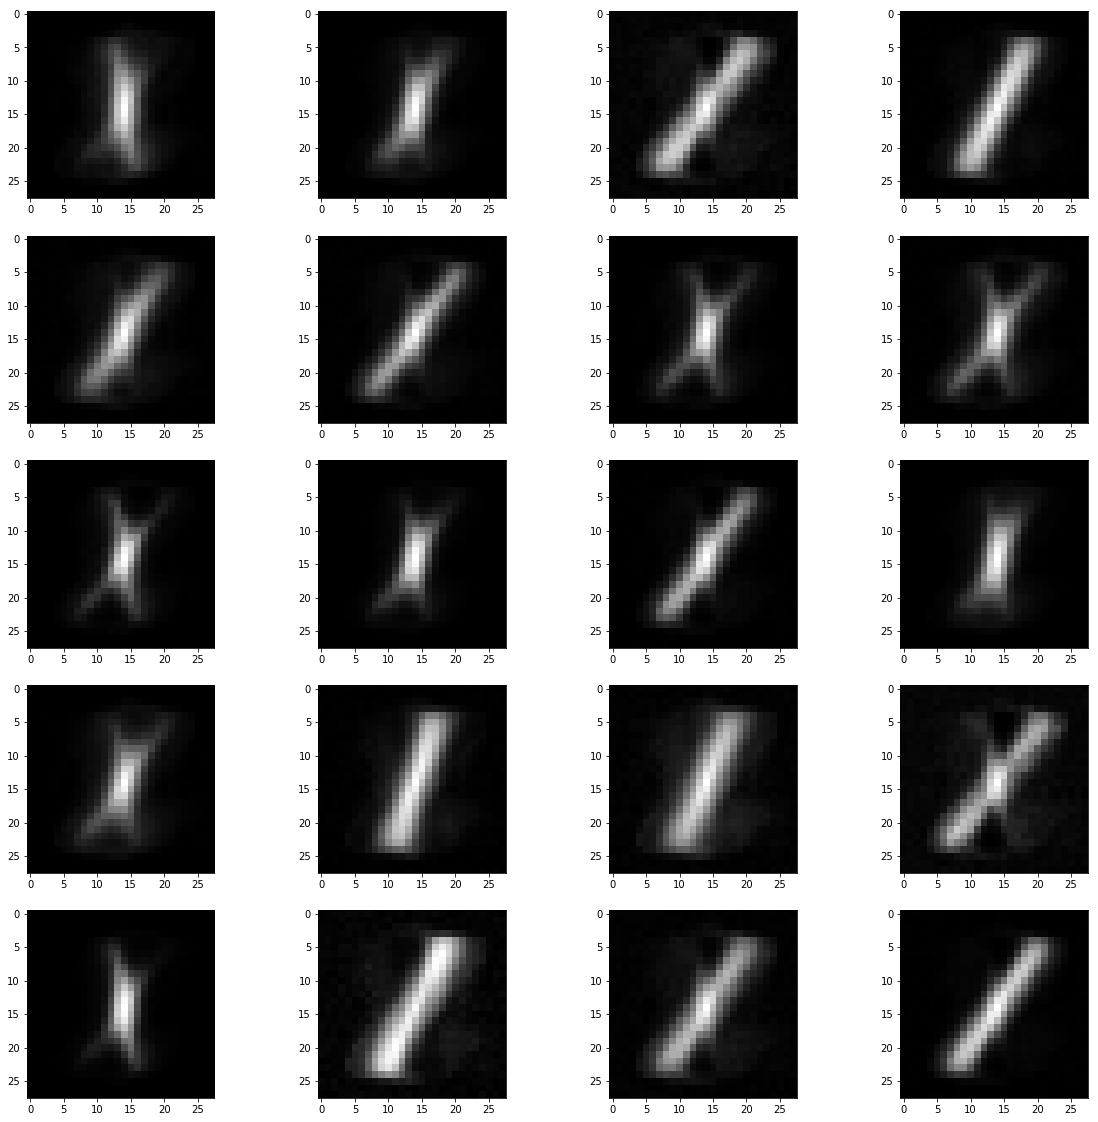

In [57]:
sampleAE(ae1)

In [ ]:
ae1 = simpleAE(10,784,'sigmoid')
ae1.compile(optimizer='adadelta', loss='binary_crossentropy')

history = ae1.fit(digitDict[1], digitDict[1],
                    epochs=100,
                    batch_size=100,verbose=1)

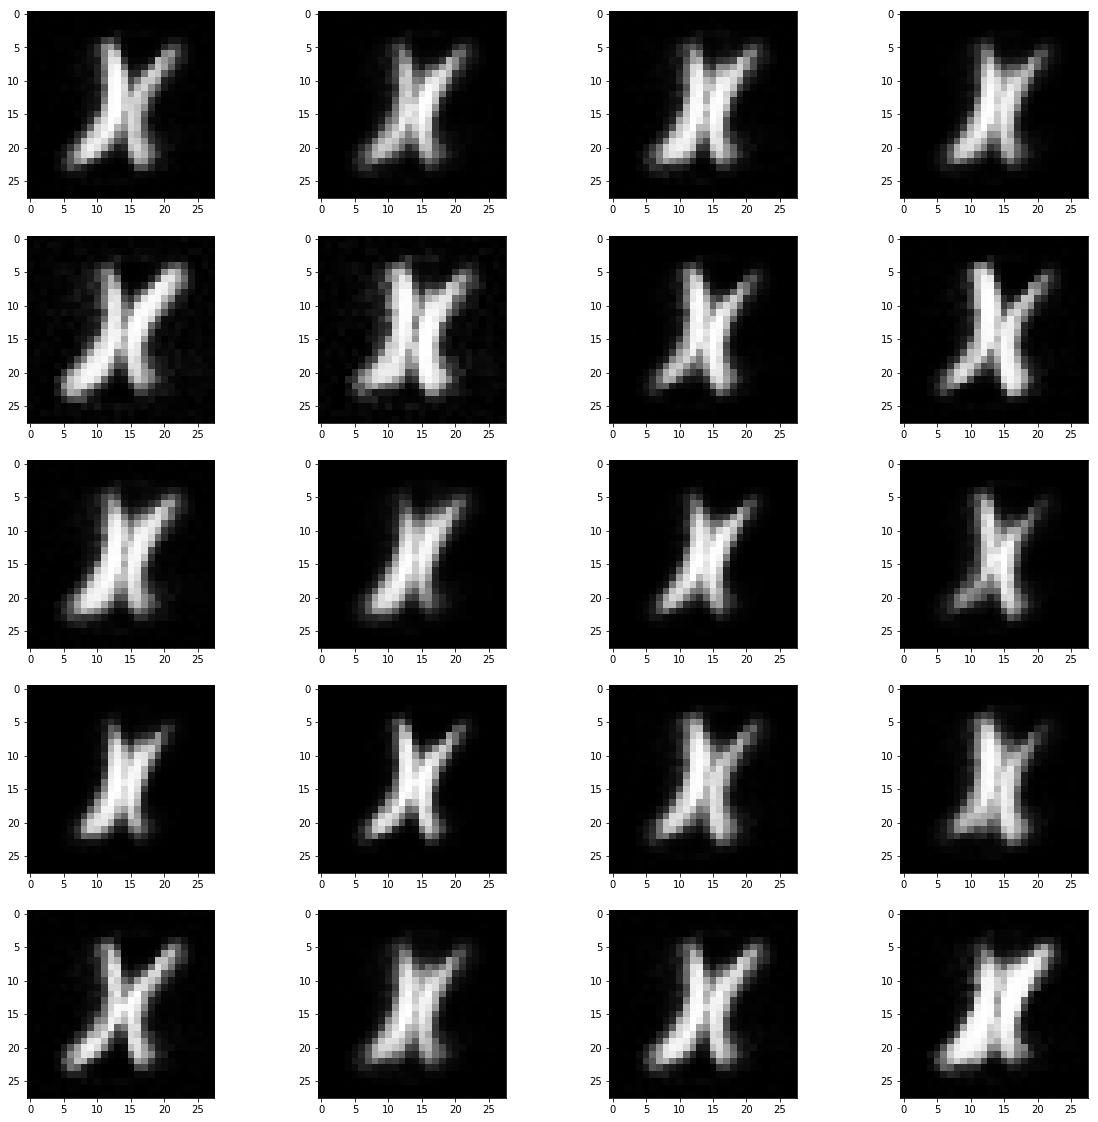

In [61]:
sampleAE(ae1)

In [183]:
ae1 = simpleAE(7,784,'sigmoid')
ae1.compile(optimizer='adadelta', loss='binary_crossentropy')

history = ae1.fit(digitDict[1], digitDict[1],
                    epochs=100,
                    batch_size=100,verbose=1)

Epoch 1/100
6179/6179 [==============================] - 1s 239us/step - loss: 0.5988
Epoch 2/100
6179/6179 [==============================] - 0s 42us/step - loss: 0.1793
Epoch 3/100
6179/6179 [==============================] - 0s 41us/step - loss: 0.1349
Epoch 4/100
6179/6179 [==============================] - 0s 43us/step - loss: 0.1280
Epoch 5/100
6179/6179 [==============================] - 0s 42us/step - loss: 0.1223
Epoch 6/100
6179/6179 [==============================] - 0s 40us/step - loss: 0.1144
Epoch 7/100
6179/6179 [==============================] - 0s 41us/step - loss: 0.1057
Epoch 8/100
6179/6179 [==============================] - 0s 45us/step - loss: 0.0995
Epoch 9/100
6179/6179 [==============================] - 0s 43us/step - loss: 0.0961
Epoch 10/100
6179/6179 [==============================] - 0s 44us/step - loss: 0.0941
Epoch 11/100
6179/6179 [==============================] - 0s 44us/step - loss: 0.0926
Epoch 12/100
6179/6179 [==============================] - 0s 4

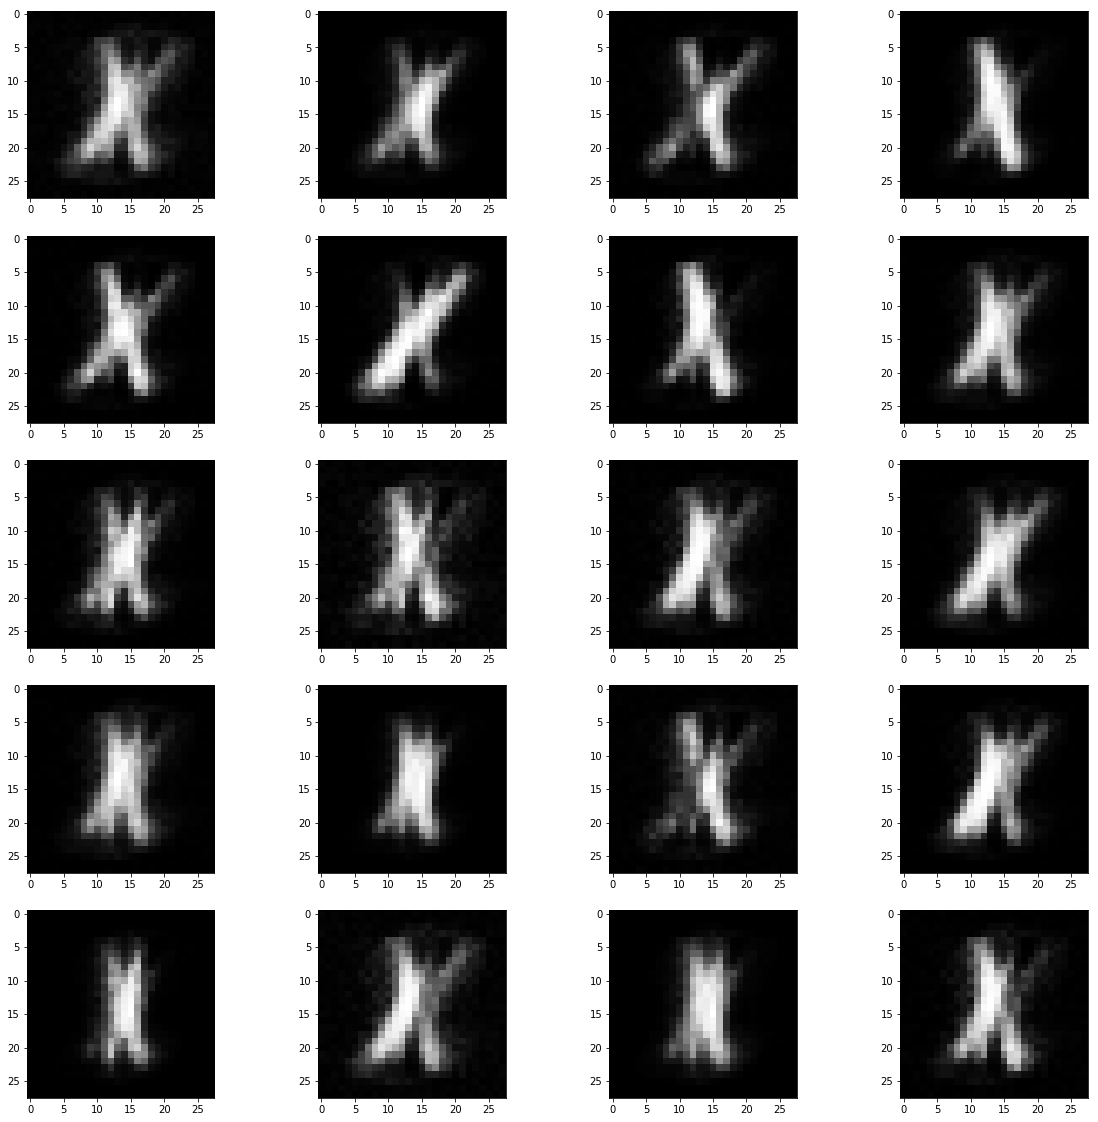

In [184]:
sampleAE(ae1)

In [ ]:
ae1 = simpleAE(10,784,'sigmoid','sigmoid')
ae1.compile(optimizer='adadelta', loss='binary_crossentropy')

history = ae1.fit(digitDict[1], digitDict[1],
                    epochs=100,
                    batch_size=1,verbose=1)

Epoch 1/100
6179/6179 [==============================] - 24s 4ms/step - loss: 0.1682
Epoch 2/100
6179/6179 [==============================] - 24s 4ms/step - loss: 0.1290
Epoch 3/100
6179/6179 [==============================] - 25s 4ms/step - loss: 0.1268
Epoch 4/100
6179/6179 [==============================] - 26s 4ms/step - loss: 0.1247
Epoch 5/100
6179/6179 [==============================] - 26s 4ms/step - loss: 0.1130
Epoch 6/100
6179/6179 [==============================] - 24s 4ms/step - loss: 0.0993
Epoch 7/100
6179/6179 [==============================] - 19s 3ms/step - loss: 0.0914
Epoch 8/100
6179/6179 [==============================] - 18s 3ms/step - loss: 0.0872
Epoch 9/100
6179/6179 [==============================] - 18s 3ms/step - loss: 0.0846
Epoch 10/100
6179/6179 [==============================] - 18s 3ms/step - loss: 0.0827
Epoch 11/100
6179/6179 [==============================] - 18s 3ms/step - loss: 0.0810
Epoch 12/100
6179/6179 [==============================] - 18s 3

In [185]:
out = ae1.output
layers = ae1.trainable_weights
gradients = K.gradients(out,layers)

randSample = np.random.binomial(1,.5,(1,28*28))

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
evaluated_gradients = sess.run(gradients,feed_dict={ae1.input:randSample})

len(evaluated_gradients[0][0])

7

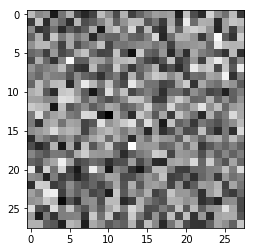

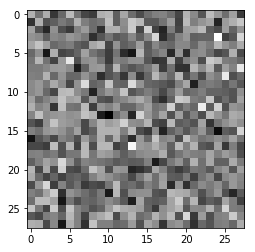

In [186]:
gradients = K.gradients(ae1.output,ae1.input)

randSample = np.random.binomial(1,.5,(1,28*28))

sess.run(tf.initialize_all_variables())
evaluated_gradients = sess.run(gradients,feed_dict={ae1.input:randSample})

samp = ae1.predict(randSample)
plt.imshow( ae1.predict((randSample - evaluated_gradients[0][0])).reshape(28,28),cmap="gray" )
plt.show()
plt.imshow(samp.reshape(28,28),cmap="gray")
plt.show()

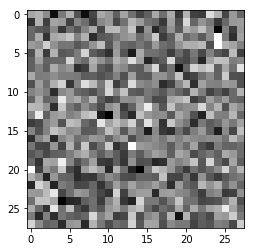

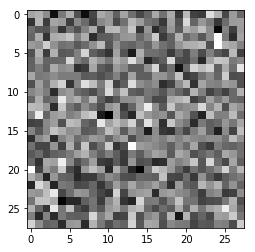

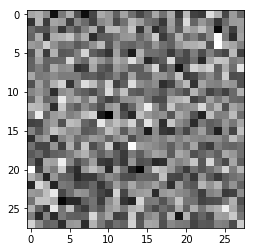

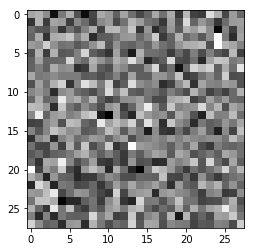

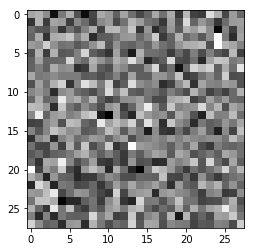

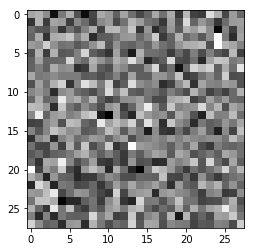

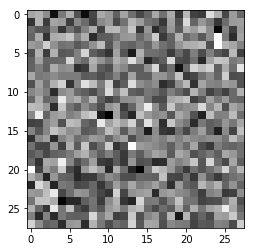

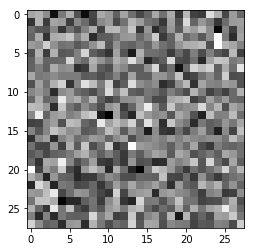

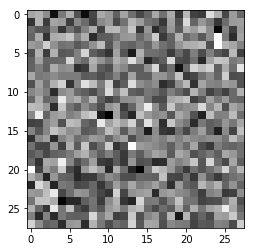

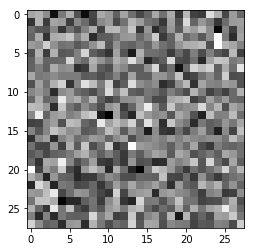

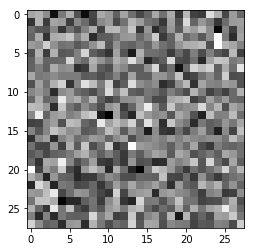

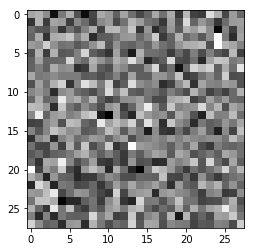

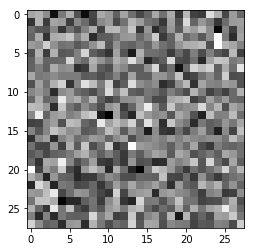

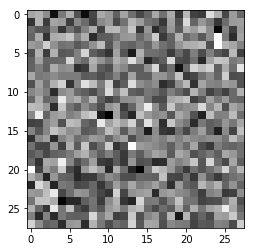

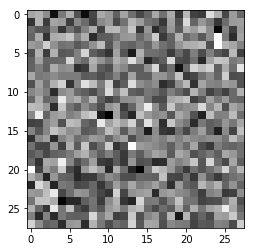

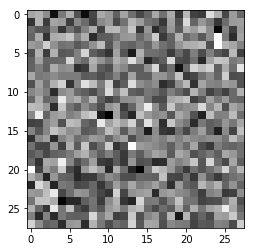

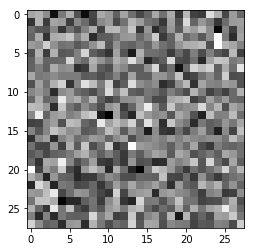

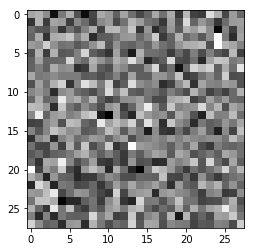

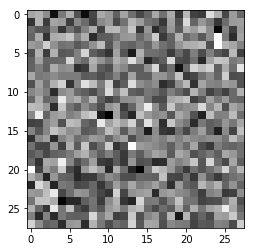

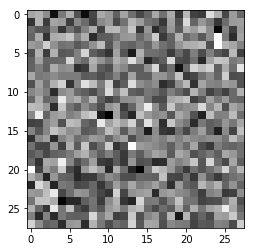

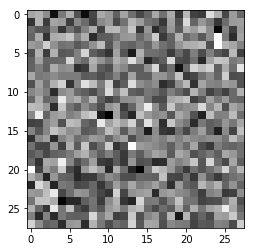

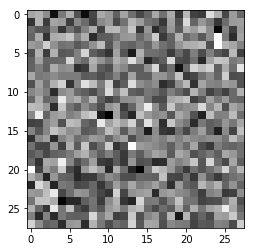

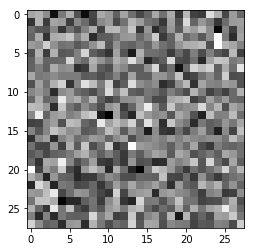

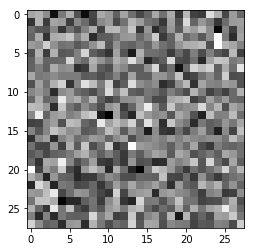

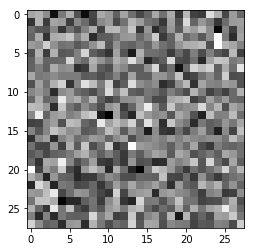

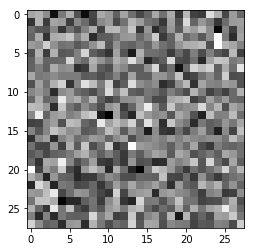

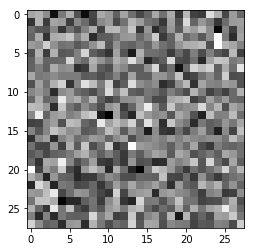

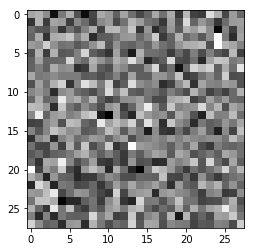

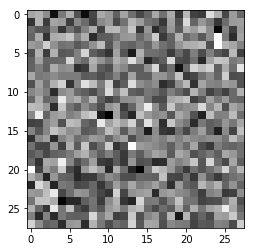

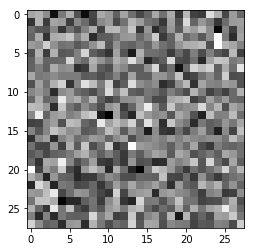

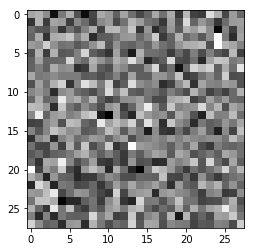

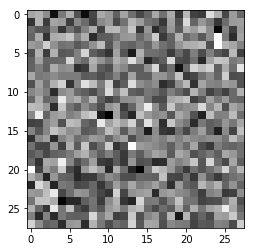

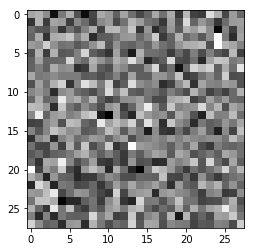

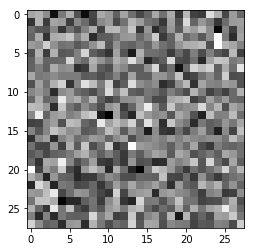

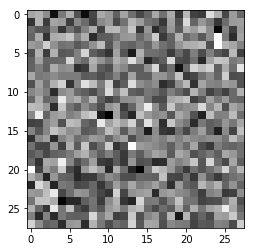

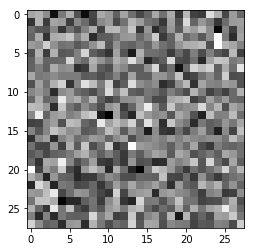

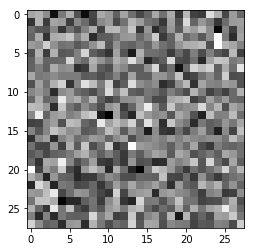

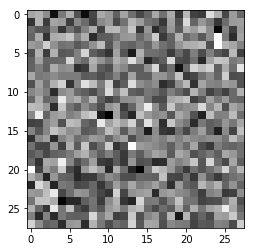

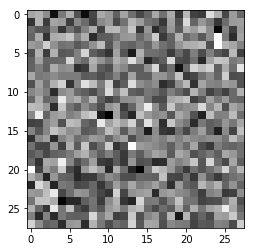

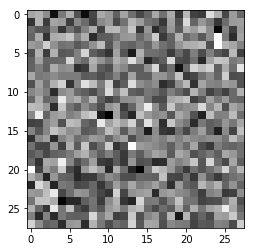

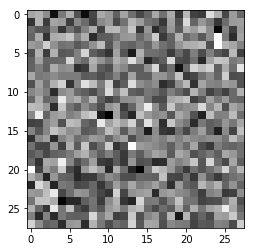

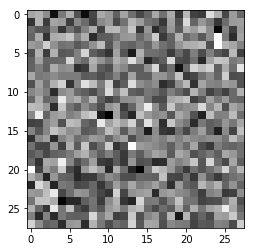

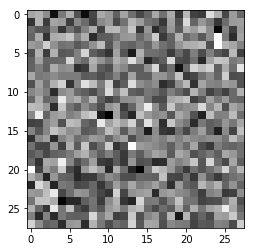

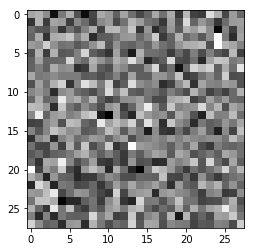

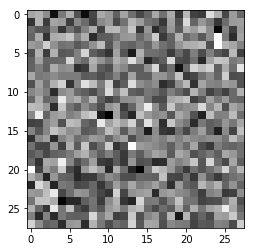

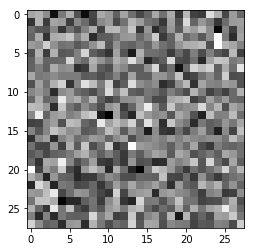

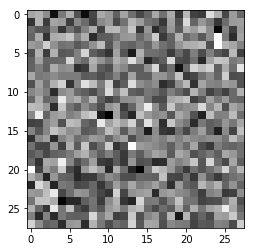

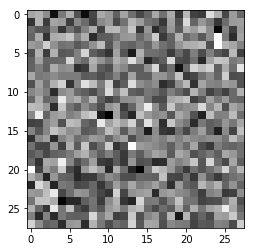

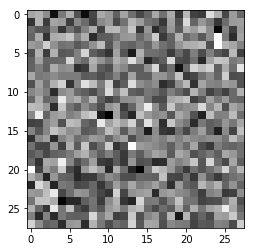

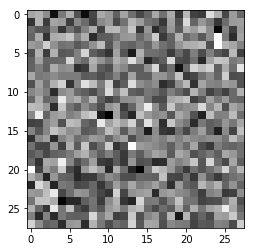

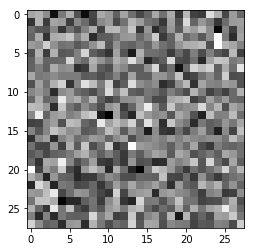

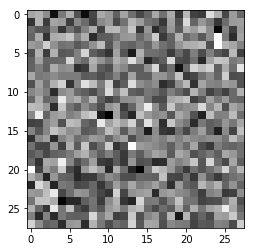

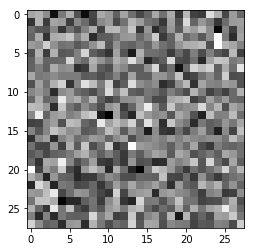

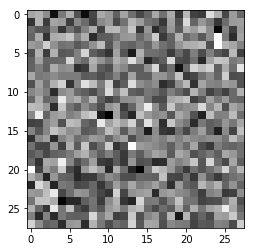

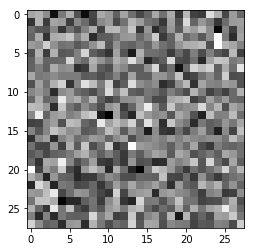

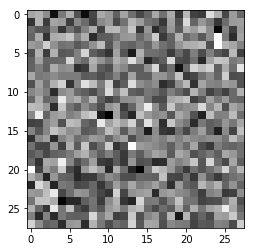

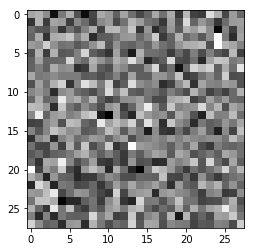

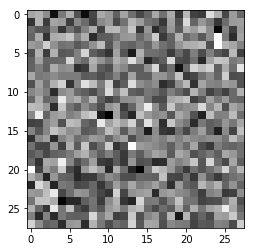

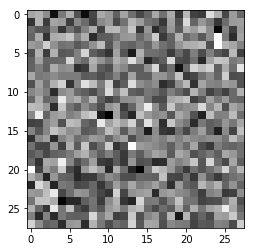

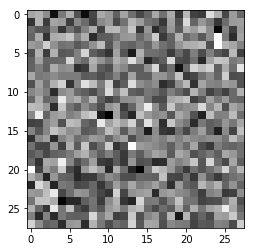

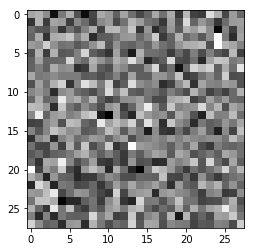

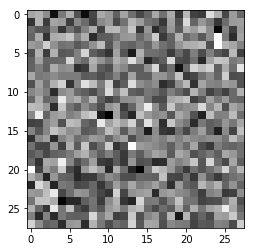

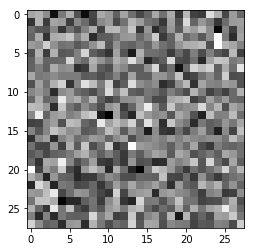

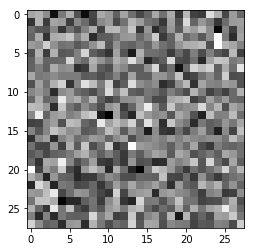

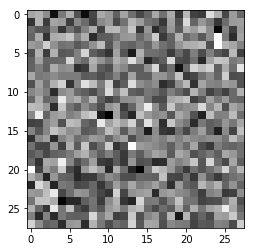

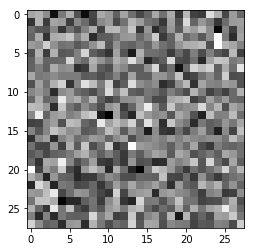

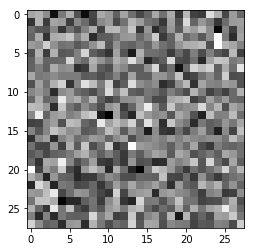

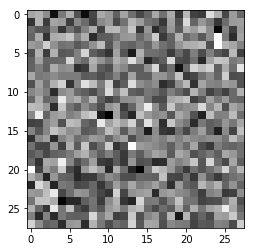

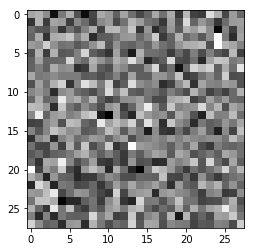

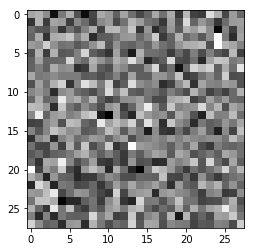

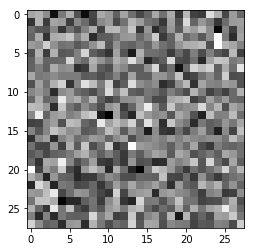

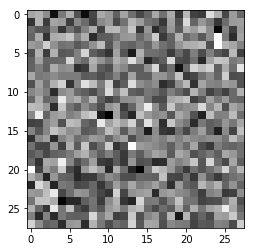

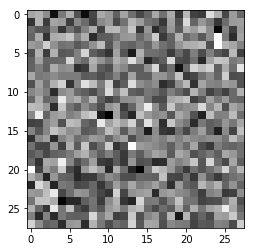

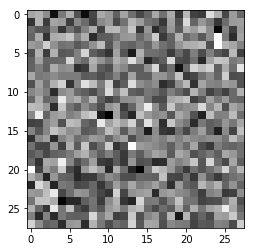

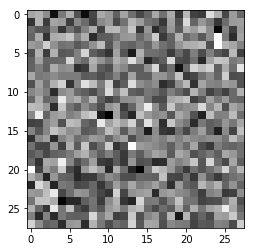

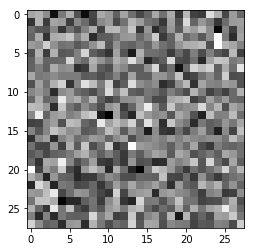

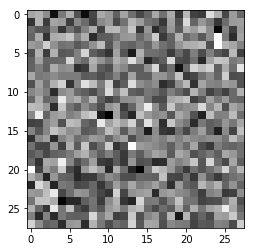

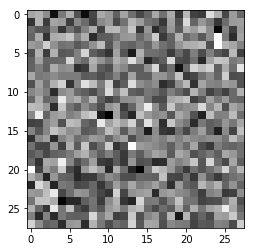

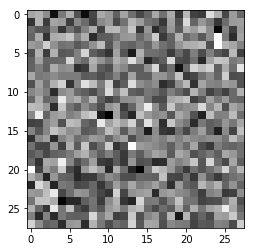

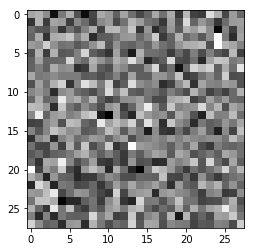

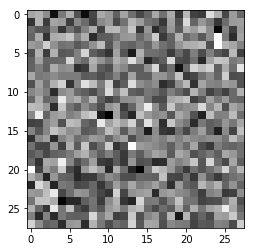

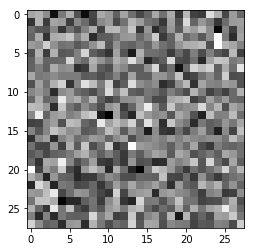

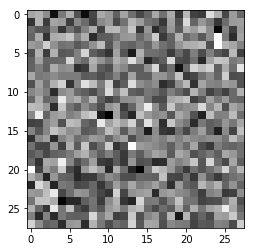

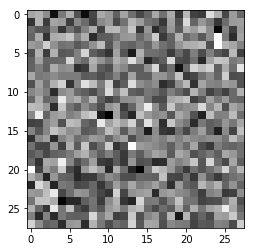

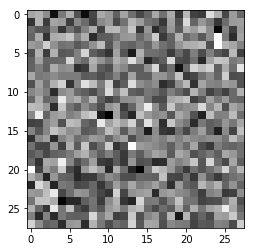

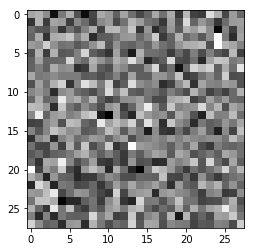

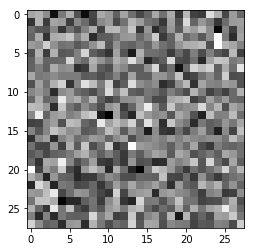

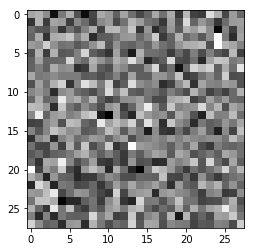

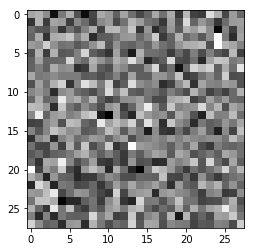

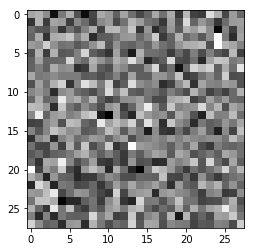

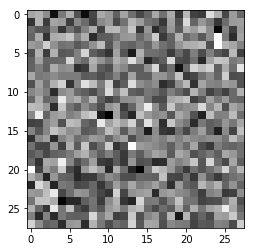

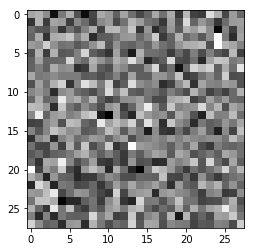

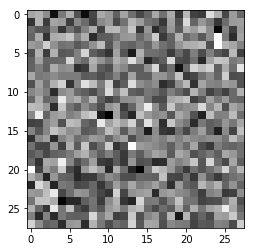

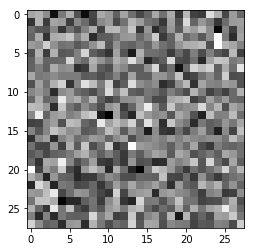

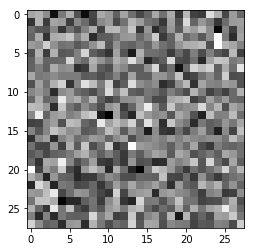

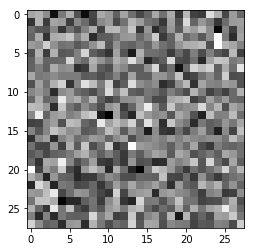

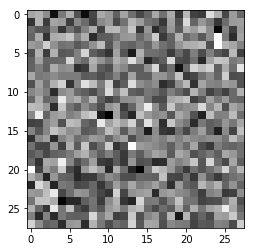

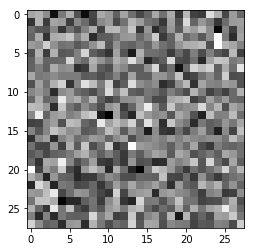

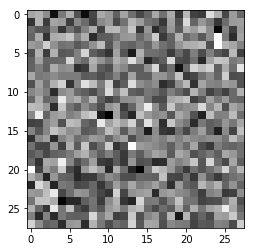

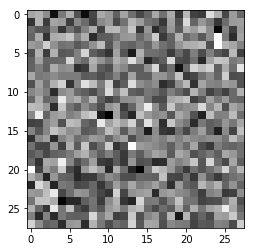

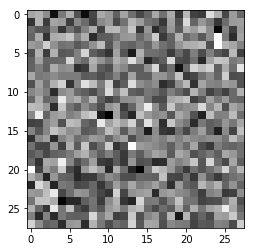

In [187]:
randSample = np.random.binomial(1,.5,(1,28*28))
res = ae1.predict(randSample - evaluated_gradients[0][0])

for i in range(100):
    res = ae1.predict(res - evaluated_gradients[0][0])
    plt.imshow( res.reshape(28,28),cmap="gray" )
    plt.show()

plt.imshow( res.reshape(28,28),cmap="gray" )
plt.show()

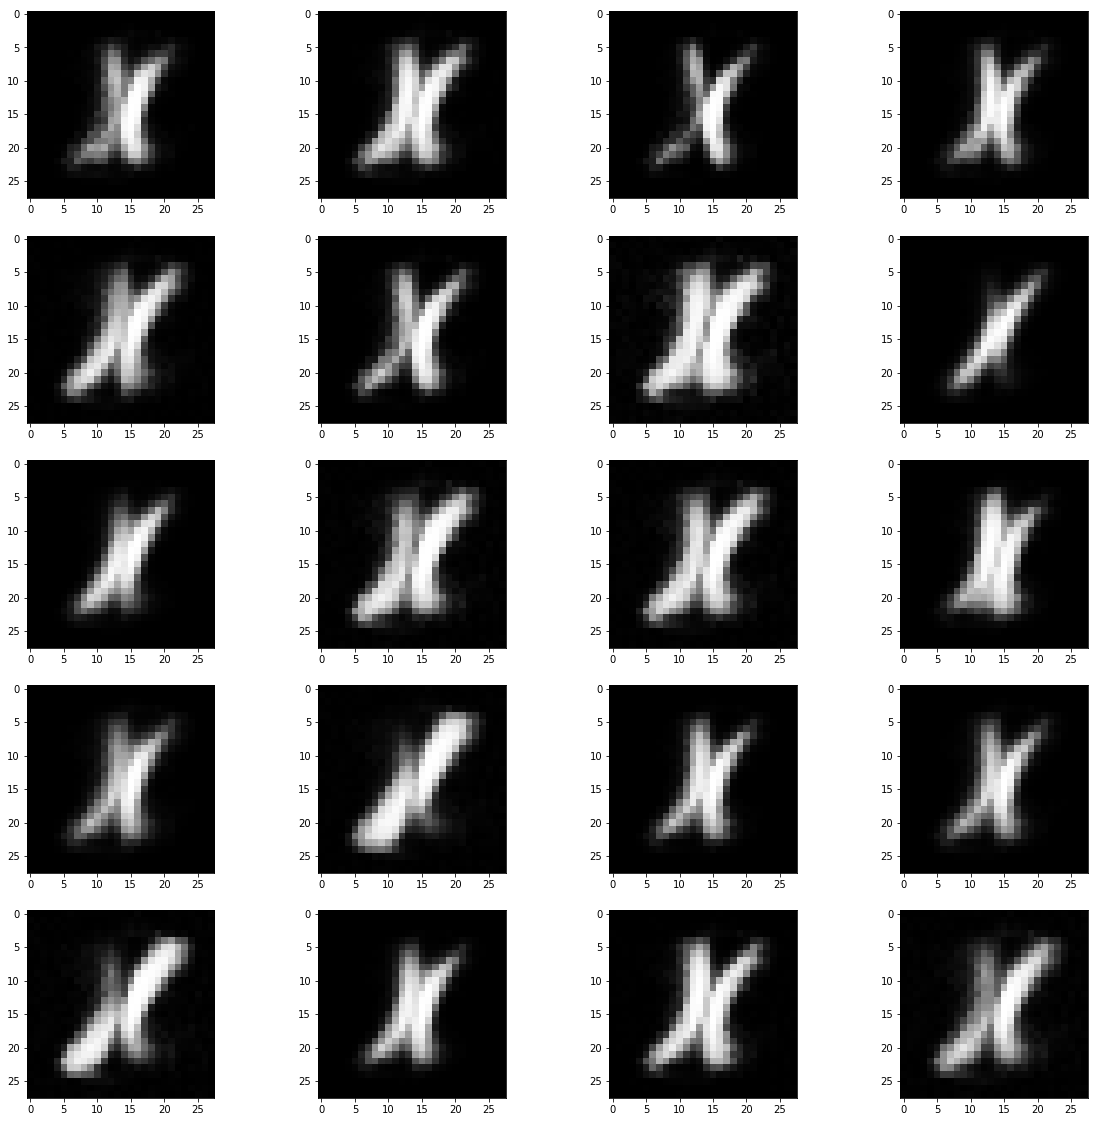

In [156]:
sampleAE(ae1)

In [ ]:
ae1 = simpleAE(10,784,'sigmoid','sigmoid')
ae1.compile(optimizer='adadelta', loss='binary_crossentropy')

history = ae1.fit(digitDict[1], digitDict[1],
                    epochs=100,
                    batch_size=10,verbose=1)

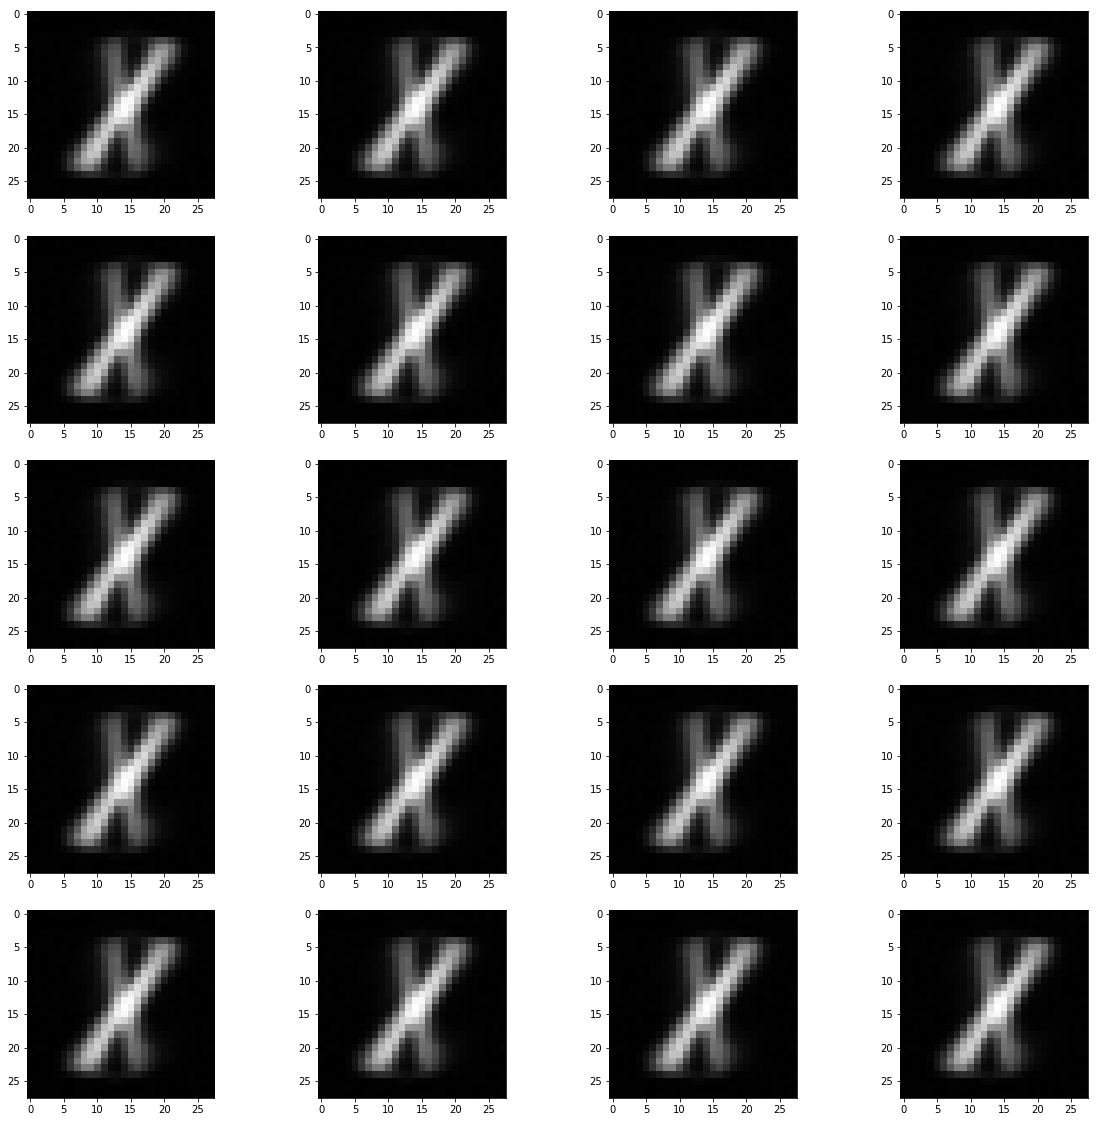

In [75]:
sampleAE(ae1)

In [ ]:
ae1 = simpleAE(10,784,'sigmoid','sigmoid')
ae1.compile(optimizer='adadelta', loss='binary_crossentropy')

history = ae1.fit(digitDict[1], digitDict[1],
                    epochs=100,
                    batch_size=100,verbose=1)

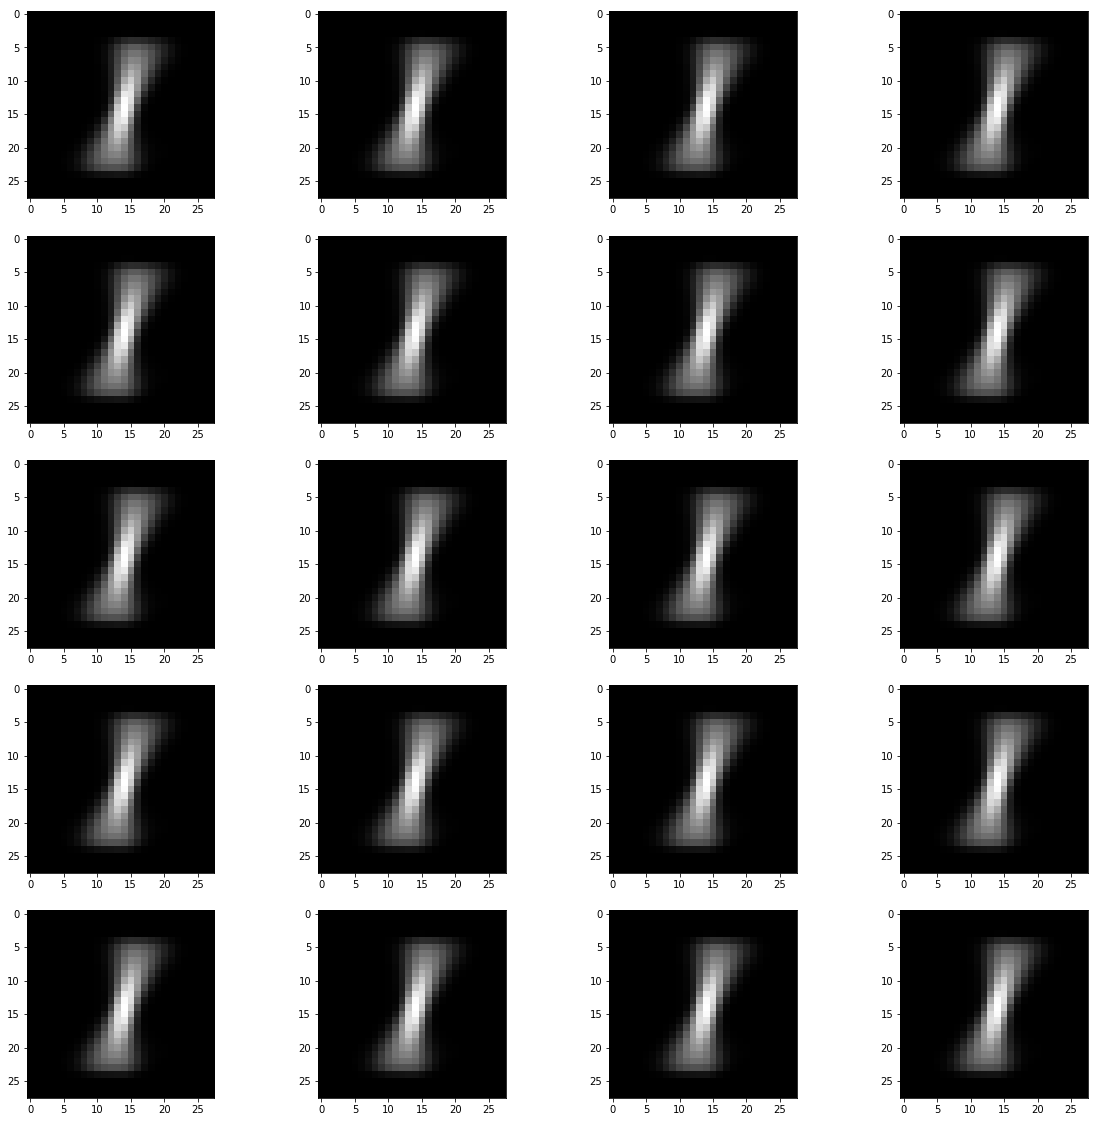

In [77]:
sampleAE(ae1)